# Brownian Motion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def quadratic_variation(X):
    return np.cumsum(np.power(np.diff(X, axis=0, prepend=0.), 2), axis=0)

In [3]:
def main():
    n = 1000 # iteration number
    d = 10 # number of Brownian motion
    T = 1.
    times = np.linspace(0.,T,n)
    dt = times[1]-times[0]
    # X_t2 - X_t1 ~ Normal with mean 0 and variance t2-t1
    dX = np.sqrt(dt) * np.random.normal(size=(n-1, d))
    X_0 = np.zeros(shape=(1, d))
    X = np.concatenate((X_0, np.cumsum(dX, axis=0)), axis=0)
    #plt.plot(times, X)
    plt.plot(times, quadratic_variation(X))
    plt.show()

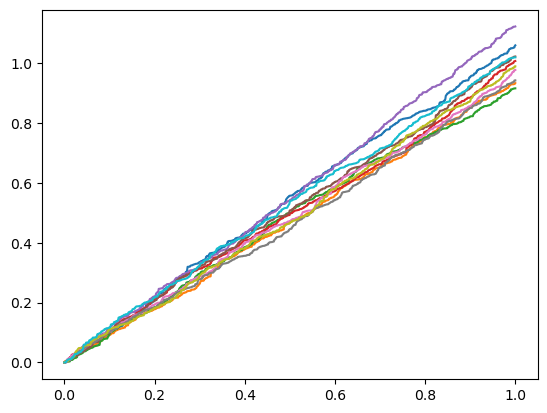

In [4]:
main()